### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [1]:
!wget http://xmlcalendar.ru/data/ru/2021/calendar.csv -O calendar.csv

--2021-05-20 08:08:30--  http://xmlcalendar.ru/data/ru/2021/calendar.csv
Resolving xmlcalendar.ru (xmlcalendar.ru)... 195.161.41.143
Connecting to xmlcalendar.ru (xmlcalendar.ru)|195.161.41.143|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1018 [text/csv]
Saving to: ‘calendar.csv’

calendar.csv        100%[===================>]    1018  --.-KB/s    in 0s      

2021-05-20 08:08:31 (132 MB/s) - ‘calendar.csv’ saved [1018/1018]



In [2]:
import datetime # для работы со временем 

import numpy as np # уже знакомые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, EasterMonday
from pandas.tseries.offsets import DateOffset, Day
%matplotlib inline

In [3]:
holiday_orig = pd.read_csv('/content/calendar.csv', parse_dates=True)
holiday_df=holiday_orig.T[1:13]
holiday_df['month'] = np.arange(1, len(holiday_df) + 1)
holiday_df.rename(columns={0:'days'},inplace=True)
holiday_df['days']=holiday_df['days'].str.replace('*','').str.split(',')


In [4]:
holiday_df['holidays']=holiday_df.apply(lambda row: [datetime.datetime(day=int(day),month=row.month,year=2021) for day in row.days],axis=1)
holidays=[st for row in holiday_df['holidays'] for st in row]
weekmask='Mon Tue Wed Thu Fri'
holiday_df

,days,month,holidays
Январь,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 23, 24...",1,"[2021-01-01 00:00:00, 2021-01-02 00:00:00, 202..."
Февраль,"[6, 7, 13, 14, 20, 21, 22, 23, 27, 28]",2,"[2021-02-06 00:00:00, 2021-02-07 00:00:00, 202..."
Март,"[6, 7, 8, 13, 14, 20, 21, 27, 28]",3,"[2021-03-06 00:00:00, 2021-03-07 00:00:00, 202..."
Апрель,"[3, 4, 10, 11, 17, 18, 24, 25, 30]",4,"[2021-04-03 00:00:00, 2021-04-04 00:00:00, 202..."
Май,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 22, 23...",5,"[2021-05-01 00:00:00, 2021-05-02 00:00:00, 202..."
Июнь,"[5, 6, 11, 12, 13, 14, 19, 20, 26, 27]",6,"[2021-06-05 00:00:00, 2021-06-06 00:00:00, 202..."
Июль,"[3, 4, 10, 11, 17, 18, 24, 25, 31]",7,"[2021-07-03 00:00:00, 2021-07-04 00:00:00, 202..."
Август,"[1, 7, 8, 14, 15, 21, 22, 28, 29]",8,"[2021-08-01 00:00:00, 2021-08-07 00:00:00, 202..."
Сентябрь,"[4, 5, 11, 12, 18, 19, 25, 26]",9,"[2021-09-04 00:00:00, 2021-09-05 00:00:00, 202..."
Октябрь,"[2, 3, 9, 10, 16, 17, 23, 24, 30, 31]",10,"[2021-10-02 00:00:00, 2021-10-03 00:00:00, 202..."


In [5]:
# кастомизация календаря
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = datetime.datetime(2021, 1, 1)
    end_date = datetime.datetime(2021, 12, 31)

russian_busday = pd.offsets.CustomBusinessDay(weekmask=weekmask, 
                                              calendar=RussianBusinessCalendar(),
                                              holidays = holidays )

In [6]:
# генерация кастомного индекса рабочих дней
bdti = pd.bdate_range('2021-01-01', '2021-12-31', freq='C', weekmask=weekmask, holidays=holidays)

In [7]:
# Создание датафрейма
dti = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
df = pd.DataFrame(index=dti)

In [8]:
# Формирование отметок дней недели
local_day={'Monday':'Пн','Tuesday':'Вт','Wednesday':'Ср','Thursday':'Чт','Friday':'Пт','Saturday':'Сб','Sunday':'Вс'}
for k,v in local_day.items():
  df[v]=np.where(df.index.day_name() == k, 1, 0)

In [9]:
# Формирование отметок месяцев
months=['Январь','Февраль','Март','Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь','Ноябрь', 'Декабрь']
for k,v in zip(range(1,len(months)+1),months):
  df[v]=np.where(df.index.month == k, 1, 0)

In [10]:
# Формирование последнего дня месяца
df['Последний день месяца']=np.where(df.index.is_month_end, 1, 0)

In [11]:
# Формирование выходных дней
df['Выходной']=np.where(~df.index.isin(bdti), 1, 0)

In [12]:
# Формирование праздничных дней
mask=(((df['Выходной'] == 1) & (df['Сб'] == 0)) & ((df['Выходной'] == 1) & (df['Вс'] == 0)))
df['Праздник']=np.where(mask,1,0)
# Учтем январские праздники
df['Праздник'][:10]=1

In [13]:
# Предпраздничный рабочий день
before=[day-russian_busday for day in df[df['Праздник']==1].index.date]
df['Предпраздничный рабочий день']= np.where(df.index.isin(before), 1, 0)

In [14]:
# Последний рабочий день месяца
last= ((df['Последний день месяца']==1) & (df['Выходной']==0))
df['Последний рабочий день месяца']= np.where(last,1,0)

In [15]:
# Предновогодний выходной день
lastny=[holiday for holiday in df[df['Выходной']==1][-2:].index if holiday.is_year_end==False]
df['Предновогодний выходной день']=0
df['Предновогодний выходной день'].loc[lastny[-1]]=1

In [16]:
df

,Пн,Вт,Ср,Чт,Пт,Сб,Вс,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Последний день месяца,Выходной,Праздник,Предпраздничный рабочий день,Последний рабочий день месяца,Предновогодний выходной день
2021-01-01,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2021-01-02,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2021-01-03,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2021-01-04,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2021-01-05,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2021-12-28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2021-12-29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2021-12-30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [17]:
!git clone https://github.com/fish34/sberbank_data_analysis.git


Cloning into 'sberbank_data_analysis'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 276 (delta 78), reused 103 (delta 44), pack-reused 97
Receiving objects: 100% (276/276), 59.65 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [18]:
ts = pd.read_csv('/content/sberbank_data_analysis/data/sber_stocks.csv', usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)
ts.head()

,CLOSE
TRADEDATE,
2013-03-25,98.79
2013-03-26,97.20
2013-03-27,96.75
2013-03-28,98.59
2013-03-29,98.76


In [19]:
ts.asfreq('1D').fillna(method='ffill')
ts.rename(columns = {'CLOSE':'Price'}, inplace = True)

In [22]:
# Лаговые переменные рабочих дней с глубинами: 1, 3, 5
ts['shift1']=ts['Price'].shift(1,freq=russian_busday).values
ts['shift3']=ts['Price'].shift(3,freq=russian_busday).values
ts['shift5']=ts['Price'].shift(5,freq=russian_busday).values

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


In [23]:
ts

,Price,shift1,shift3,shift5
TRADEDATE,,,,
2013-03-25,98.79,98.79,98.79,98.79
2013-03-26,97.20,97.20,97.20,97.20
2013-03-27,96.75,96.75,96.75,96.75
2013-03-28,98.59,98.59,98.59,98.59
2013-03-29,98.76,98.76,98.76,98.76
...,...,...,...,...
2020-01-03,255.00,255.00,255.00,255.00
2020-01-06,253.90,253.90,253.90,253.90
2020-01-08,259.15,259.15,259.15,259.15


In [25]:
# Скользящие статистики ['mean', 'median', 'max', 'min', 'std'] с окнами 1, 3, 5 сгрупированные по дням недели
ts['weekday'] = ts.index.weekday
ts['rolling_mean_1']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=1).mean())
ts['rolling_mean_3']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=3).mean())
ts['rolling_mean_5']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=5).mean())
ts['rolling_median_1']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=1).median())
ts['rolling_median_3']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=3).median())
ts['rolling_median_5']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=5).median())
ts['rolling_max_1']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=1).max())
ts['rolling_max_3']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=3).max())
ts['rolling_max_5']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=5).max())
ts['rolling_min_1']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=1).min())
ts['rolling_min_3']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=3).min())
ts['rolling_min_5']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=5).min())
ts['rolling_std_1']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=1).std())
ts['rolling_std_3']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=3).std())
ts['rolling_std_5']=ts.groupby('weekday')['Price'].transform(lambda x: x.rolling(window=5).std())


In [26]:
ts.head()

,Price,shift1,shift3,shift5,weekday,rolling_mean_1,rolling_mean_3,rolling_mean_5,rolling_median_1,rolling_median_3,rolling_median_5,rolling_max_1,rolling_max_3,rolling_max_5,rolling_min_1,rolling_min_3,rolling_min_5,rolling_std_1,rolling_std_3,rolling_std_5
TRADEDATE,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,98.79,98.79,98.79,0,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,97.20,97.20,97.20,1,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,96.75,96.75,96.75,2,96.75,NaN,NaN,96.75,NaN,NaN,96.75,NaN,NaN,96.75,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,98.59,98.59,98.59,3,98.59,NaN,NaN,98.59,NaN,NaN,98.59,NaN,NaN,98.59,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,98.76,98.76,98.76,4,98.76,NaN,NaN,98.76,NaN,NaN,98.76,NaN,NaN,98.76,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням
# Т.к. данные календаря фомрировал за 2021й год, а курс акций на полный текущий год неизвестен, то статитстки сформирую c группировкой по дню недели

ts['expanding_mean']=ts.groupby('weekday')['Price'].transform(lambda x: x.expanding().mean())
ts['expanding_median']=ts.groupby('weekday')['Price'].transform(lambda x: x.expanding().median())
ts['expanding_max']=ts.groupby('weekday')['Price'].transform(lambda x: x.expanding().max())
ts['expanding_min']=ts.groupby('weekday')['Price'].transform(lambda x: x.expanding().min())
ts['expanding_std']=ts.groupby('weekday')['Price'].transform(lambda x: x.expanding().std())

In [ ]:
ts.head(30)

,Price,shift1,shift3,shift5,weekday,rolling_mean_1,rolling_mean_3,rolling_mean_5,rolling_median_1,rolling_median_3,rolling_median_5,rolling_max_1,rolling_max_3,rolling_max_5,rolling_min_1,rolling_min_3,rolling_min_5,rolling_std_1,rolling_std_3,rolling_std_5,expanding_mean,expanding_median,expanding_max,expanding_min,expanding_std
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,0,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,98.79,NaN,NaN,NaN,NaN,NaN,98.790000,98.790,98.79,98.79,NaN
2013-03-26,97.20,98.79,NaN,NaN,1,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,97.20,NaN,NaN,NaN,NaN,NaN,97.200000,97.200,97.20,97.20,NaN
2013-03-27,96.75,97.20,NaN,NaN,2,96.75,NaN,NaN,96.75,NaN,NaN,96.75,NaN,NaN,96.75,NaN,NaN,NaN,NaN,NaN,96.750000,96.750,96.75,96.75,NaN
2013-03-28,98.59,96.75,98.79,NaN,3,98.59,NaN,NaN,98.59,NaN,NaN,98.59,NaN,NaN,98.59,NaN,NaN,NaN,NaN,NaN,98.590000,98.590,98.59,98.59,NaN
2013-03-29,98.76,98.59,97.20,NaN,4,98.76,NaN,NaN,98.76,NaN,NaN,98.76,NaN,NaN,98.76,NaN,NaN,NaN,NaN,NaN,98.760000,98.760,98.76,98.76,NaN
2013-04-01,98.07,98.76,96.75,98.79,0,98.07,NaN,NaN,98.07,NaN,NaN,98.07,NaN,NaN,98.07,NaN,NaN,NaN,NaN,NaN,98.430000,98.430,98.79,98.07,0.509117
2013-04-02,98.93,98.07,98.59,97.20,1,98.93,NaN,NaN,98.93,NaN,NaN,98.93,NaN,NaN,98.93,NaN,NaN,NaN,NaN,NaN,98.065000,98.065,98.93,97.20,1.223295
2013-04-03,99.59,98.93,98.76,96.75,2,99.59,NaN,NaN,99.59,NaN,NaN,99.59,NaN,NaN,99.59,NaN,NaN,NaN,NaN,NaN,98.170000,98.170,99.59,96.75,2.008183
2013-04-04,99.91,99.59,98.07,98.59,3,99.91,NaN,NaN,99.91,NaN,NaN,99.91,NaN,NaN,99.91,NaN,NaN,NaN,NaN,NaN,99.250000,99.250,99.91,98.59,0.933381


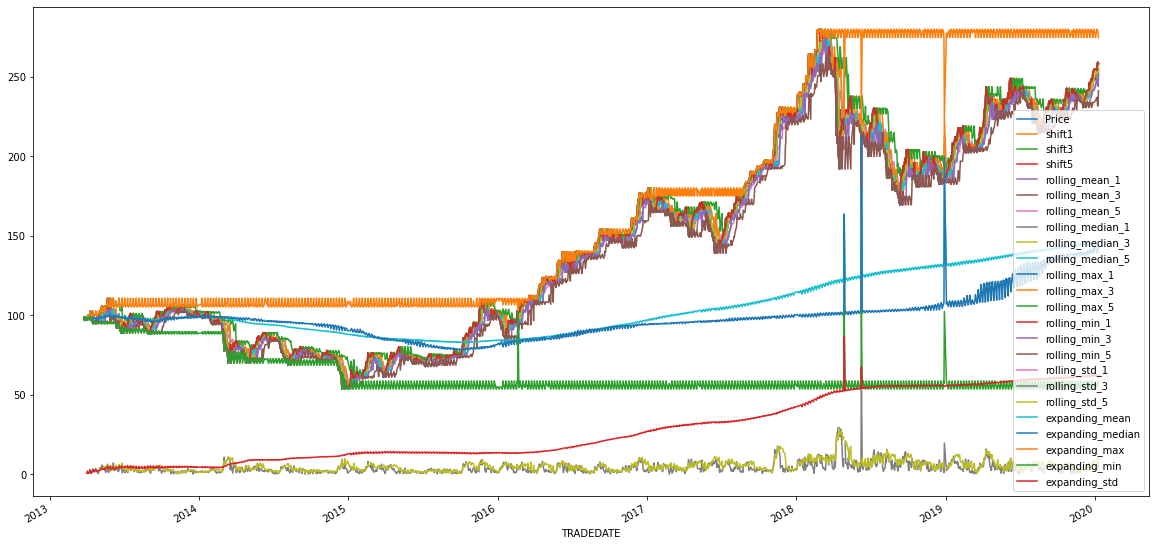

In [ ]:
ts.loc[:, ts.columns != 'weekday'].plot(figsize=(20, 10))